In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
plt.rcParams['font.size'] = 14

np.random.seed(0)

import imp;
from IPython.core.display import HTML
css_file = '../my.css';
HTML(open(css_file, "r").read())

# Inferential statistics (hypothesis testing)

In inferential statistics we again make inferences about a population given (a) sample(s) of the population. However, this time we make a **claim** about the population and use the sample(s) to estimate the likelihood of this claim by making assumptions about the sample(s).

### The one sample t-test

To explain this further, consider a lab where protein mixtures with known concentration for each protein are produced by a highly sensitive machine. Each day the machine is tested by sampling $n$ mixtures and measuring their protein concentrations. Let's focus on one protein "proteinA". To accomodate the mixture standards, the mean proteinA concentration should be 0.3 with a variance smaller than 0.0001.

Before we continue we make the following **assumptions**:

- the shape of the proteinA concentration distribution in the mixtures is normal
- the mixtures are drawn independently (e.g. by simple random sampling)

To verify that the proteinA concentration in the mixtures fulfills the strict criteria we collect 9 mixtures at random from a day's batch (we put these in the Python list `x_mixtures`. We now have a sample with sample size $n=9$ that was independently drawn from the population. For each of the 9 mixtures we measure the proteinA concentration. 

Now we make the following claim: the mean proteinA concentration $\mu$ of the population from which $x$ is drawn is $\mu_0 = 0.3$. 

To investigate this we compute the difference $D_{observed}$ between our sample's mean $\overline{x}$ and the claimed mean $\mu_0 = 0.3$:

In [2]:
#this is the protein mixture sample 
x_mixtures = [0.30091,0.29085,0.29334,0.28738,0.29404,0.28581,0.31260,0.30408,0.28908]
n=9 #there are 9 observations in the sample

mu0 = 0.3 #this is the claimed mean of the population

#we compute the difference between sample mean and mu0
D_observed = np.mean(x_mixtures)-mu0
print "observed mean difference: %f" % D_observed

observed mean difference: -0.004657


Is $D_{observed}$ **significant**? Should we conclude that something is wrong with the machine and stop it?

To answer this question we again assume that we have access to the full population of mixtures. Let's create a population of proteinA concentrations ($N=100000$) that fulfills the criteria, i.e. $\mu=0.3$ and $\sigma < 0.01$ (again, in reality we don't have access to this distribution):

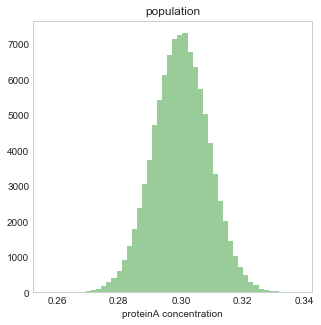

In [3]:
#the population is normal, so it is fully determined by the mean and the variance
mu = 0.3
sigma = 0.009

N = 100000 #this is the size of our simulated population

population = np.random.normal(size=N,loc=mu,scale=sigma)

plt.figure(figsize=(5,5))
sns.distplot(population,color="g",kde=False) #plot distribution
plt.xlabel("proteinA concentration")
plt.title("population")
plt.show()

Next we simulate drawing many ($m=100000$) samples $x$ with $n=9$ from this population. For each sample we compute the difference $D$ between the sample mean $\overline{x}$ and $\mu_0$

$$D = \overline{x}-\mu_0,$$

and plot the distribution of these differences D:

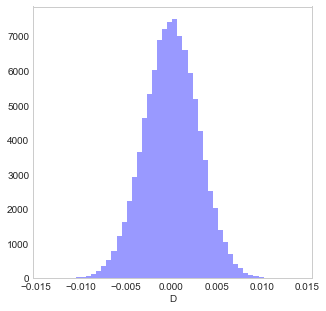

In [4]:
m = 100000
mean_diffs = []
for i in range(m):
    x = np.random.choice(population,size=n) #draw a sample from the population with size n
    D = np.mean(x)-mu0 #compute mean difference
    mean_diffs.append(D) #add to list
   
plt.figure(figsize=(5,5))
sns.distplot(mean_diffs,color="b",kde=False) #plot distribution
plt.xlabel("D")
plt.show()

Now, we know all the samples have been drawn from a population with $\mu=\mu_0=0.3$. So, none of the differences $D$ we observe in the above distribution are significant. The distribution of these differences $D$ is called a **null distribution** for the one sample t-test. 

We make another assumption: we have full access to all possible differences $D$ such that we know the full null distribution for our test:

In [5]:
null_distribution = mean_diffs[:]

It is important to note that the shape of the null distribution depends strongly on the sample size $n$ and the variance $\sigma$ of the population from which the samples were drawn (so not on the actual value of $\mu$ itself). To illustrate this for the variance of the population we draw samples with $n=9$ from populations with an increasing variance and compute null distributions as we did before:

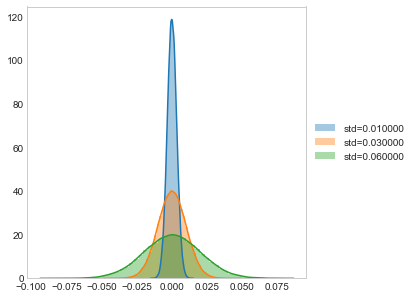

In [6]:
plt.figure(figsize=(5,5))
for sigma_new in [0.01,0.03,0.06]:
    #create a new population 
    population_new = np.random.normal(size=N,loc=mu,scale=sigma_new)
    #compute new null distribution
    mean_diffs = []
    for i in range(m):
        x = np.random.choice(population_new,size=n)
        D = np.mean(x)-mu0
        mean_diffs.append(D)
    sns.distplot(mean_diffs,label="std=%f"%sigma_new)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Similarly for the sample size $n$, we fix the population variance and compute null distributions for different values of $n$:

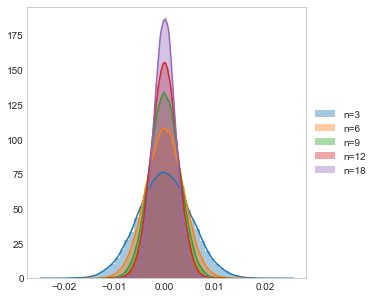

In [7]:
plt.figure(figsize=(5,5))
for n in [3,6,9,12,18]:
    mean_diffs = []
    for i in range(m):
        x = np.random.choice(population,size=n)
        D = np.mean(x)-mu0
        mean_diffs.append(D)
    sns.distplot(mean_diffs,label="n=%i"%n)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We observe that these shapes clearly differ. 

Consider again the one sample `x_mixtures` we have drawn from the protein mixtures with the following difference $D_{observed}$ between $\overline{x}$ and $\mu$:

In [8]:
print D_observed

-0.004656666666666587


Again, is this difference **significant**?

**To check this we need to compute the probability that $D_{observed}$ or a more extreme difference is observed under the null distribution**. If this probability would for instance be zero, then we know that our sample was not drawn from a population with $\mu=\mu_0=0.3$. 

To compute this probability we first compute the probability that the null distribution of $D$ has a value equal to $D_{observed} = -0.004657$ or lower. In the null distribution below this is the red area of the left tail of the distribution divided by the total area of the null distribution. 

However, as we are testing whether the population mean equals $\mu_0 = 0.3$ we need to also compute the probability that the null distribution of $D$ has a value equal to 0.004657 of higher which is marked by the red area on the right tail of the null distribution shown below. This is called a two-tailed hypothesis test.

<img src="pvalue2.png" width="492" height="334" />

If we would for instance test if the population has a mean $\mu<0.3$ then we would consider only the red area in the left tail of the null distribution. This is called a one-tailed hypothesis test.

As we have access to the full null distribution we can compute the red area under the null distribution by counting the number of differences $D$ in the null distribution for which $D \le -0.004657$ or $D \ge 0.004657$ and then divide by the total area of the null distribution:

In [9]:
if D_observed < 0:
    print (np.sum(np.array(null_distribution)<=D_observed) + 
           np.sum(np.array(null_distribution)>=-1*D_observed))/float(m)
else:
    print (np.sum(np.array(null_distribution)<=-1*D_observed) + 
           np.sum(np.array(null_distribution)>=D_observed))/float(m)

0.12022


So, the probability of observing $D_{observed} = \overline{x}-\mu=-004657$ when $x$ with $n=9$ is drawn from a population with $\mu=0.3$ and $\sigma=0.01$ equals 0.12.

Once more, is this significant? What we are really asking is whether this probability we obtained is low enough to conclude that the population mean $\mu \ne \mu_0$. For this we need to set a threshold $\alpha$ (the **significance level**). If the probability of observing $\mu_0$ under the null distribution is equal or smaller than $\alpha$ then we call this difference significant and conclude that the sample is not drawn from a population with mean $\mu=\mu_0$. So, if we would have set $\alpha=0.01$ then we conclude that the mean of the population from which the sample was drawn is indeed 0.3. 

We have just conducted a one sample t-test. This is a hypothesis test that claims that the mean of a population $\mu$ from which a sample is drawn is equal to some value $\mu_0$. As with all hypothesis testing there are two hypothesis:

- The null hypothesis ($H_0$) states that $\mu=\mu_0$.
- The two-tailed hypothesis ($H_1$) states that $\mu \ne \mu_0$.

There are also two possible one-tailed hypothesis:

- The upper-tailed hypothesis ($H_1$) states that $\mu > \mu_0$.
- The lower-tailed hypothesis ($H_1$) states that $\mu < \mu_0$.

Given a sample $x$ with sample size $n$ the one sample t-test computes what is called the **T-statistic**:

$$T = \frac{\overline{x}-\mu}{s_{n-1}^2 / \sqrt{n}},$$

which follows a null distribution called the Student’s t-distribution with $n-1$ degrees of freedom. We can see that the T-statistic is very simmilar to the difference $D$ we defined above, except for the normalization term $\frac{s_{n-1}^2}{\sqrt{n}}$. 

So, why do we need the normalization term and what are the degrees of freedom? As we have seen, the shape of the null distribution depends on the variance $\sigma$ of the population from which the sample is drawn. The normalization term $\frac{s_{n-1}^2}{\sqrt{n}}$ removes the relation between  the variance of the population and the shape of the null ditribution ( Student’s t-distribution). 

To illustrate this we draw samples with $n=9$ from populations with an increasing variance and plot a null distribution of the T-statistic for each of the populations (similarly as was done above):

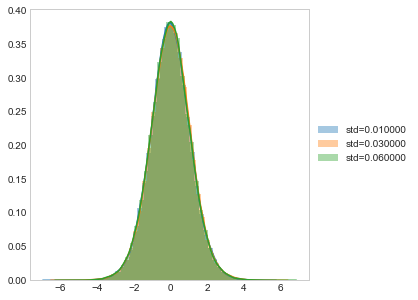

In [10]:
plt.figure(figsize=(5,5))
for sigma_new in [0.01,0.03,0.06]:
    #create a new population 
    population_new = np.random.normal(size=N,loc=mu,scale=sigma_new)
    #compute new null distribution
    mean_diffs = []
    for i in range(m):
        x = np.random.choice(population_new,size=n)
        T = (np.mean(x)-mu0) / (np.std(x)/np.sqrt(n))
        mean_diffs.append(T)
    sns.distplot(mean_diffs,label="std=%f"%sigma_new)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We see that the null distributions now all have the same shape. 

The dependency of the shape of the null distribution on the sample size $n$ is taken into account by the degrees of freedom (by choosing the Student’s t-distribution that corresponds to a sample size of $n-1$). 

From the Student’s t-distribution with $n-1$ degrees of freedom the probability of observing $\mu_0$ or a more extreme T-statistic is computed. This probability is called the **p-value**. 

Finally the p-value is compared against the significance leve $\alpha$.

Just as we did before, the one sample t-test assumes that

- the population of the random variable is normaly distributed
- the sample observations are drawn independently

In Pyhon we have access to libraries (also known as modules) that contain code that perform hypothesis testing, one of them is "scipy".

We can simply perform a one sample t-test as:

In [11]:
import scipy.stats as stats
print stats.ttest_1samp(np.array(x_mixtures),mu0)

Ttest_1sampResult(statistic=-1.5811067786317883, pvalue=0.15250957664808368)


We see that the p-value computed by the test is very close to the p-value we obtained.

Now, suppose we draw a sample of the protein mixtures on another day:

In [12]:
x_mixtures_bad = [ 0.30419177, 0.31555843, 0.33328223, 0.31513569, 0.32529619, 0.32035438, 0.32235052, 0.30535766, 0.30275455]
print "Mean bad sample: %f" % np.mean(x_mixtures_bad)
print stats.ttest_1samp(np.array(x_mixtures_bad), mu0)

Mean bad sample: 0.316031
Ttest_1sampResult(statistic=4.602717542264939, pvalue=0.0017492282903386613)


This time the p-value is much lower and more than low enough ($\alpha=0.01$) to conclude that the mean proteinA concentration in the mixtures is not 0.3. 

### Chi-Square Test for the Variance

We also want to use our $n=9$ sample to check if the variance of the population $\sigma^2$ is smaller than 0.0001. We can use the chi-square hypothesis test for the variance to make a claim about the variance of the population. It claims that the variance of the population $\sigma^2$ from which the sample was drawn is equal to some claimed value $\sigma_0^2$. 

- The null hypothesis ($H_0$) states that $\sigma^2 = \sigma_0^2$. 
- The two-tailed alternative hypothesis ($H_1$) states that $\sigma^2 \ne \sigma_0^2$. 

In our case we want to test if $\sigma^2 < \sigma_0^2$. This is a lower-tailed test for which the alternative hypothesis is  

- The lower-tailed alternative hypothesis ($H_1$) states that $\sigma^2 < \sigma_0^2$.

Similarly there exists a upper-tailed test:

- The upper-tailed alternative hypothesis ($H_1$) states that $\sigma^2 > \sigma_0^2$.

Again a T-statistic is used to compute a null distribution for the null hypothesis. In this case the T-stastic is:

$$T = \frac{n-1}{s_{n-1}^2/\sigma_0^2}.$$

Notice the ratio $\frac{s_{n-1}^2}{\sigma_0^2}$ that becomes 1 if both variance are the same.

The T-statistic for the chi-square test for the variance follows a chi-square distribution with $n-1$ degrees of freedom. Let's create such a null distribution:

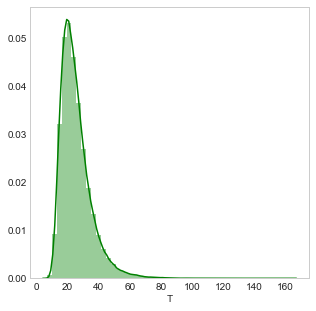

In [13]:
sigma0 = 0.01

null_distribution = []
for i in range(m):
    x = np.random.choice(population,size=n)
    T = (n-1)/(np.var(x)/(sigma0**2))
    null_distribution.append(T)
    
plt.figure(figsize=(5,5))
sns.distplot(null_distribution,color="g")
plt.xlabel("T")
plt.show()

We can see that this **chi-square distribution** is not at all symmetrical. 

So, what is the probability that $\sigma^2<\sigma_0^2$? We can simply count the number of observations in our null distribution that have $s_{n-1}^2<\sigma_0^2$:

In [14]:
T_statistic = (n-1)/(np.var(x_mixtures)/(sigma0**2))
print "T-statistic: %f" % T_statistic

p_value = np.sum(null_distribution<T_statistic)/float(m)
print "p-value: %f" % p_value

T-statistic: 24.498023
p-value: 0.558420


Finally we use $\alpha$ to make our final conclusions.

### The (unpaired) two sample t-test for equal means

The unpaired two sample t-test for equal means is a hypothesis test that claims that the means of two samples $x_1$ with sample size $n_1$ and $x_2$ with sample size $n_2$ are equal. It makes the following assumptions:

- the shape of the distribution of the population from which both samples are (potentially) drawn should be normal
- both samples have equal variance
- the samples should be drawn independently

Again we define two hypothesis:

- The null hypothesis $H_0$ states that $\overline{x}_1 = \overline{x}_2$.
- The two-tailed alternative hypothesis $H_1$ states that $\overline{x}_1 \ne \overline{x}_2$.

The T-statistic that is used to test the null hypothesis is:

$$T = \frac{\overline{x}_1 - \overline{x}_2}{SE(\overline{x}_1 - \overline{x}_2)}$$

where the denominator is the standard error of the difference between the means. It is computed as 

$$SE(\overline{x}_1 - \overline{x}_2) = s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

where $s_p$ is the pooled variance of both samples and is computed as

$$s_p = \sqrt{\frac{(n_1-1)s_1^2 (n_2-1)s_2^2}{n_1 +n_2 -2}}$$

where $s_1$ and $s_2$ are the standard deviations of samples $x_1$ and $x_2$ respectively. This T-statistic follows a Student’s t-distribution with $n_1+n_2-2$ degrees of freedom.

Now what does this mean? To explain this we should understand the unpaired two sample t-test for equal means as a test to determine whether two independent samples with equal variance were drawn from populations having the same normal distribution. 


To illustrate this we again create a population to draw from (so again we assume we know the full population). We create a population for the expression level of a geneA (as we did before):

In [15]:
mu_gene = 0.26
sigma_gene = 0.01

N = 100000

population_gene = np.random.normal(size=N,loc=mu_gene,scale=sigma_gene)

First we compute a null distribution for the difference $D$ between the means (so without the standard error in the denominator), i.e.

$D=\overline{x}_1-\overline{x}_2.$

We do this by repeatedly drawing $m$ times two samples with $n_1=n_2=9$ from the population and computing $D$ for each of the two samples: 

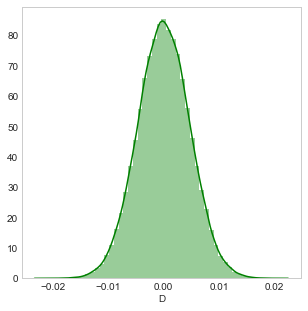

In [16]:
n = 9

null_distribution = []
for i in range(m):
    x1 = np.random.choice(population_gene,size=n)
    x2 = np.random.choice(population_gene,size=n)
    D = (np.mean(x1)-np.mean(x2))
    null_distribution.append(D)
    
plt.figure(figsize=(5,5))
sns.distplot(np.array(null_distribution),color="g")
plt.xlabel("D")
plt.show()

Just as with the one sample t-test the shape of this distribution depends on the variance of the population from which the samples are drawn. We can see this by plotting null distributions for $D$ by sampling from populations with an increasing variance:

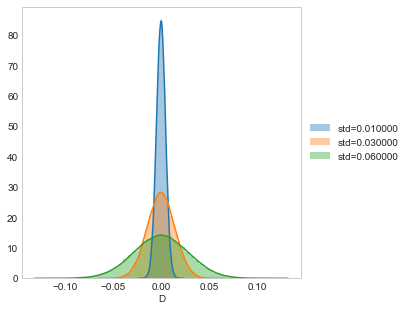

In [17]:
plt.figure(figsize=(5,5))
for sigma_gene_new in [0.01,0.03,0.06]:
    population_gene_new = np.random.normal(size=N,loc=mu_gene,scale=sigma_gene_new)
    null_distribution_new = []
    for i in range(m):
        x1 = np.random.choice(population_gene_new,size=n)
        x2 = np.random.choice(population_gene_new,size=n)
        D = (np.mean(x1)-np.mean(x2))
        null_distribution_new.append(D)
    sns.distplot(np.array(null_distribution_new),label="std=%f"%sigma_gene_new)
plt.xlabel("D")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The standard error of the difference between the means in the denominator of the T-statistic removes this dependency:

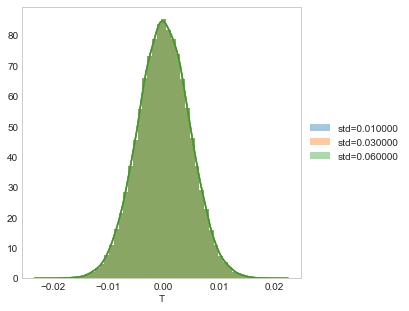

In [18]:
# a function to compute the T-statistic from two samples x1 and x2
def compute_T_statistic(x1,x2):
    sp = np.sqrt(((n-1)*np.var(x1)+(n-1)*np.var(x2))/float(n+n-2))
    SE = sp * np.sqrt((1./n)+(1./n))
    T_statistic = (np.mean(x1)-np.mean(x2))/SE
    return T_statistic

plt.figure(figsize=(5,5))    
for sigma_gene_new in [0.01,0.03,0.06]:
    population_gene_new = np.random.normal(size=N,loc=mu_gene,scale=sigma_gene_new)
    null_distribution_new = []
    for i in range(N):
        x1 = np.random.choice(population_gene_new,size=n)
        x2 = np.random.choice(population_gene_new,size=n)
        null_distribution_new.append(compute_T_statistic(x1,x2)) #this is the only part that changed
    sns.distplot(np.array(null_distribution),label="std=%f"%sigma_gene_new)

plt.xlabel("T")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

This leaves us with a null distribution for the T-statistic that depends only on $n_1$ and $n_2$ which is taken care of by the degrees of freedom for the Student’s t-distribution.

Before we continue we a create the null distribution for samples sizes $n_1=n_2=9$ by repeadelty sampling $x_1$ and $x_2$ **from the same population**. Note that this null distribution does not depend on the mean $\mu$ of the population.

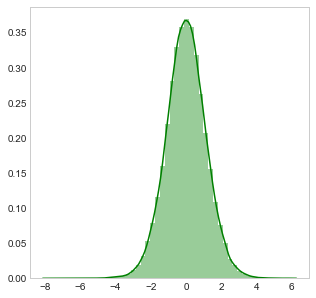

In [19]:
n = 9
null_distribution = []
for i in range(N):
    x1 = np.random.choice(population_gene,size=n)
    x2 = np.random.choice(population_gene,size=n)
    null_distribution.append(compute_T_statistic(x1,x2))
plt.figure(figsize=(5,5))    
sns.distplot(np.array(null_distribution),color="g")
plt.show()

Now, let's say we have two genes geneA and geneB and we want to know whether the mean expression level of these genes is the same. 

First we look at the case where the mean expression is indeed the same. We create two populations (one for geneA and one for geneB) where both populations have the same mean and variance. 

In [20]:
mu_geneA = 0.26
sigma_geneA = 0.01
mu_geneB = 0.26
sigma_geneB = 0.01

N = 100000

population_geneA = np.random.normal(size=N,loc=mu_geneA,scale=sigma_geneA)
population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma_geneB)

Next we draw a sample for geneA and a sample for geneB with $n_A=n_B=9$ and compute the T-statistic:

In [21]:
n = 9

geneA = np.random.choice(population_geneA,size=n)
print "Mean geneA: %f" % np.mean(geneA)
geneB = np.random.choice(population_geneB,size=n)
print "Mean geneB: %f" % np.mean(geneB)
print "Mean difference: %f" % (np.mean(geneA)-np.mean(geneB))
T_observed = compute_T_statistic(geneA,geneB)
print "T-statistic: %f" % T_observed

Mean geneA: 0.260084
Mean geneB: 0.260343
Mean difference: -0.000259
T-statistic: -0.047983


Now we count the number of observations in our null distribution that a value equal to this T-statistic value or more extreme. Since we do a two-tailed hypothesis test this means counting both sides of null distribution:

In [22]:
if T_observed < 0:
    print (np.sum(np.array(null_distribution)<=T_observed) + 
           np.sum(np.array(null_distribution)>=-1*T_observed))/float(N)
else:
    print (np.sum(np.array(null_distribution)<=-1*T_observed) + 
           np.sum(np.array(null_distribution)>=T_observed))/float(N)

0.96502


This is the p-value we obtain for our test. Again we need to set a significance level $\alpha$ to decide on rejecting the null hypothesis and therefor accepting the alternative hypothesis.

In Python the following code performs a two sample t-test:

In [23]:
print stats.ttest_ind(geneA,geneB)

Ttest_indResult(statistic=-0.04523876509350718, pvalue=0.964476807816701)


Note that this T-statistic and p-value are very close to what we obtained using our simulated populations.

Now let's look at the case where geneB is sampled from a population with a different mean:

In [24]:
mu_geneB = 0.275
sigma_geneB = 0.01

N = 100000

population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma_geneB)

geneA = np.random.choice(population_geneA,size=n)
print "Mean geneA: %f" % np.mean(geneA)
geneB = np.random.choice(population_geneB,size=n)
print "Mean geneB: %f" % np.mean(geneB)
print "Mean difference: %f" % (np.mean(geneA)-np.mean(geneB))
T_observed = compute_T_statistic(geneA,geneB)
print "T-statistic: %f" % T_observed

Mean geneA: 0.256922
Mean geneB: 0.275101
Mean difference: -0.018179
T-statistic: -4.502141


And we compute the p-value:

In [25]:
if T_observed < 0:
    print (np.sum(np.array(null_distribution)<=T_observed) + 
           np.sum(np.array(null_distribution)>=-1*T_observed))/float(N)
else:
    print (np.sum(np.array(null_distribution)<=-1*T_observed) + 
           np.sum(np.array(null_distribution)>=T_observed))/float(N)

print "python function result: "
stats.ttest_ind(geneA,geneB)

0.00061
python function result: 


Ttest_indResult(statistic=-4.244658897425809, pvalue=0.0006180453714537861)

As expected, this p-value is much smaller.

It should be clear to you by now that different samples for geneA and geneB will produce different T-statistics and as such different p-values. So, depending the sample sometimes we will accept the null hypothesis and sometimes we will reject it eventhough the samples are drawn from the same populations from which we want to make inferences.

Let's illustrate this by repeatedly drawing samples for geneA and geneB, computing the p-value and plotting these p-values as a boxplot: 

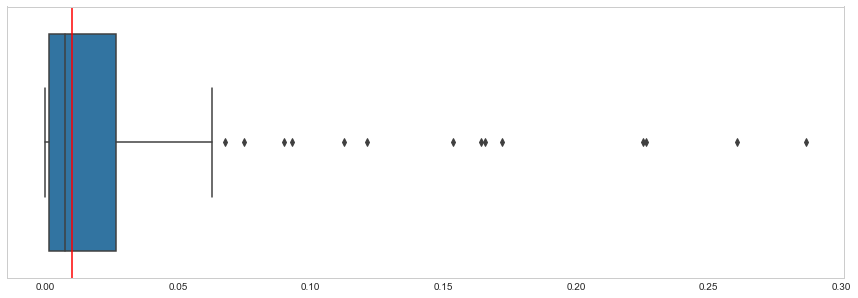

In [26]:
mu_geneA = 0.26
mu_geneB = 0.275
sigma = 0.01 #std is the same for both populations

N = 100000

population_geneA = np.random.normal(size=N,loc=mu_geneA,scale=sigma)
population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma)

df = pd.DataFrame()

pvalues = []
for i in range(100):
    geneA = np.random.choice(population_geneA,size=n)
    geneB = np.random.choice(population_geneB,size=n)
    pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)

df["p-values"] = pvalues
plt.figure(figsize=(15,5))
sns.boxplot(df,showfliers=True)
plt.axvline(x=0.01,c='r')
plt.show()

The red line corresponds to $\alpha=0.01$. The boxplot shows that eventhough the difference in mean expression between geneA and geneB is not equal, in many cases the null hypothesis is incorrectly accepted. 
It just depends on the samples that were drawn, i.e. random chance.

This brings us to the notion of **the power of a hypothesis test**. It is defined as the probability of correctly rejecting a false null hypothesis. To explain this we consider the situation where we increase the variance of the populations from which the samples are drawn while keeping the difference between the mean of the two populations and the sample sizes $n_1=n_2=n$ constant. 

The following boxplot shows the p-values obtained by repeatedly drawing samples for geneA and geneB from populations with increasing variance:

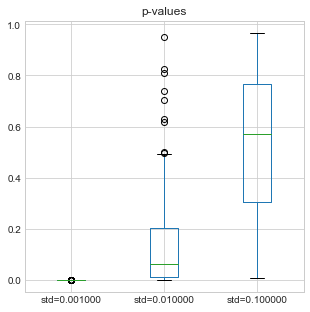

In [27]:
mu_geneA = 0.26
mu_geneB = 0.27

N = 100000

df = pd.DataFrame()

for sigma in [0.001,0.01,0.1]:
    population_geneA = np.random.normal(size=N,loc=mu_geneA,scale=sigma)
    population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma)
    pvalues = []
    for i in range(100):
        geneA = np.random.choice(population_geneA,size=n)
        geneB = np.random.choice(population_geneB,size=n)
        pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)
    df["std=%f"%sigma] = pvalues
plt.figure(figsize=(5,5))
df.boxplot()
plt.title("p-values")
plt.show()

The boxplots show how the p-values become larger for an increasing population variance (the null hypothsis is incorrectly accepted when $p \gt \alpha$).
So the power of the two sample t-test decreases as the variance of the populations increases.

Similarly, for a fixed difference in mean and a fixed variance of the populations we can look at the effect of an increasing sample sizes $n_1$ and $n_2$. We will look at the case where $n_1=n_2=n$: 

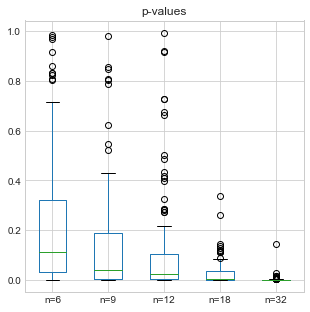

In [28]:
mu_geneA = 0.26
mu_geneB = 0.27
sigma = 0.01

N = 100000

df = pd.DataFrame()

for n in [6,9,12,18,32]:
    population_geneA = np.random.normal(size=N,loc=mu_geneA,scale=sigma)
    population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma)
    pvalues = []
    for i in range(100):
        geneA = np.random.choice(population_geneA,size=n)
        geneB = np.random.choice(population_geneB,size=n)
        pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)
    df["n=%i"%n] = pvalues
plt.figure(figsize=(5,5))
df.boxplot()
plt.title("p-values")
plt.show()

We can see that the power of the two sample t-test increase as the sample size increases. In fact, and this is important, for large sample sizes any difference between the means will become significant!

### The paired two sample t-test for equal means

The paired two sample t-test for equal means is a hypothesis test that claims that the means of two samples $x_1$ with sample size $n$ and $x_2$ with sample size $n$ are equal for the case where observations in one sample can be paired with observations in the other sample.

In this case the T-statistic that is used to test the null hypothesis is:

$$T = \frac{\overline{d}}{SE(\overline{d})},$$

where $\overline{d}$ is the mean difference between the paired observations and $SE(\overline{d})$ is the standard error of the mean difference. It is computed as 

$$SE(\overline{d}) = \frac{s_d}{\sqrt{n}},$$

where $s_d$ is the standard deviation of the differences between the paired observations. This T-statistic follows a Student’s t-distribution with $n-1$ degrees of freedom.

As an example consider measuring the expression level of geneA in $n=9$ randomly selected persons at two time points $t_1$ and $t_2$. The measurement at $t_1$ is a control measurement while $t_2$ is a measurement after taking a certain drug. We want to know if the drug has any effect on the expression level of geneA. We do this by comparing the mean expression level of geneA at $t_1$ with the mean expression level at $t_2$.   

Let's create a population for geneA:

In [29]:
mu = 0.26
sigma = 0.01

N = 100000

population = np.random.normal(size=N,loc=mu,scale=sigma)

First we consider the case where there is no difference in mean expression between $t_1$ and $t_2$. We draw two samples from the population of geneA expression levels and pair the observations at random, i.e. the pairing has no specific meaning:

In [30]:
n = 9

geneA_t1 = np.random.choice(population,size=n)
geneA_t2 = np.random.choice(population,size=n)

# create DataFrame
df = pd.DataFrame()
df["geneA_t1"] = geneA_t1
df["geneA_t2"] = geneA_t2

df.head()

,geneA_t1,geneA_t2
0,0.249167,0.236328
1,0.268423,0.274042
2,0.260147,0.264856
3,0.273292,0.252791
4,0.272207,0.250165


Each row in our dataset is now one paired observation (one person measured at two different time points). To make this more clear we can plot these observations as follows:

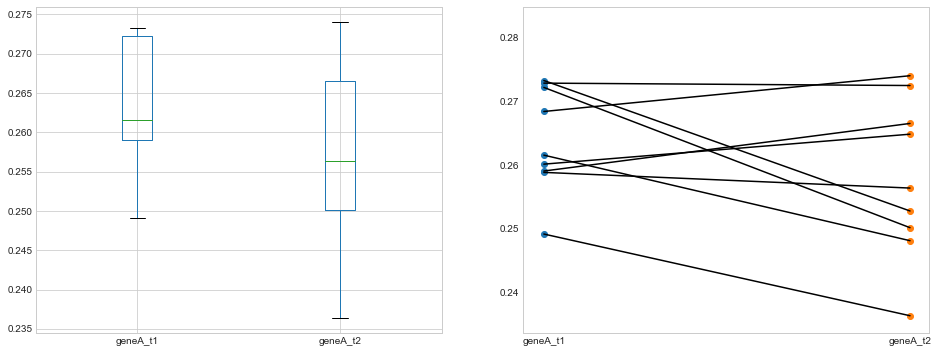

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df.boxplot()
plt.subplot(1,2,2)
# plotting the points
plt.scatter(np.zeros(len(geneA_t1)), geneA_t1)
plt.scatter(np.ones(len(geneA_t2)), geneA_t2)
# plotting the lines
for i in range(len(geneA_t1)):
    plt.plot( [0,1], [geneA_t1[i], geneA_t2[i]], c='k')
plt.xticks([0,1], ['geneA_t1', 'geneA_t2'])
plt.show()

The plot on the right shows how the observations are paired. We have seen that we can perform an unpaired two sample t-test using the following Python code:

In [32]:
print stats.ttest_ind(geneA_t1,geneA_t2)

Ttest_indResult(statistic=1.2003035399514836, pvalue=0.24749219335412623)


The Python code to perform a paired two sample t-test is:

In [33]:
print stats.ttest_rel(geneA_t1,geneA_t2)

Ttest_relResult(statistic=1.5705851040246477, pvalue=0.1549203498659095)


We can see that both tests accept the null hypothesis for $\alpha = 0.01$.
Now let's again create paired observations but this time the expression level for the observation in $t_2$ is consistently higher as compared to the same observation in $t_1$: 

In [34]:
n = 9

geneA_t1 = np.random.choice(population,size=n)
geneA_t2 = geneA_t1 + np.random.normal(size=n,loc=0.005,scale=0.001) #adding a radom value to the observation in t1

# create DataFrame
df = pd.DataFrame()
df["geneA_t1"] = geneA_t1
df["geneA_t2"] = geneA_t2

df.head()

,geneA_t1,geneA_t2
0,0.250884,0.255354
1,0.266815,0.271730
2,0.265260,0.270999
3,0.270382,0.276543
4,0.268946,0.274151


We can again plot this dataset:

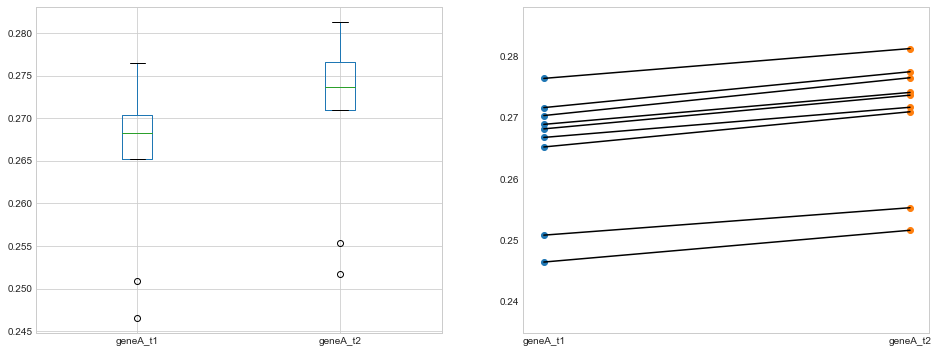

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df.boxplot()
plt.subplot(1,2,2)
# plotting the points
plt.scatter(np.zeros(len(geneA_t1)), geneA_t1)
plt.scatter(np.ones(len(geneA_t2)), geneA_t2)
# plotting the lines
for i in range(len(geneA_t1)):
    plt.plot( [0,1], [geneA_t1[i], geneA_t2[i]], c='k')
plt.xticks([0,1], ['geneA_t1', 'geneA_t2'])
plt.show()

We compare the unpaired and paired t-test gain:

In [36]:
print "unpaired test: %f" % stats.ttest_ind(geneA_t1,geneA_t2).pvalue
print "paired test: %f" % stats.ttest_rel(geneA_t1,geneA_t2).pvalue

unpaired test: 0.273887
paired test: 0.000000


Now we see a big diference between the p-values computed by both test. While the unpaired t-test does not conclude a difference in mean between $t_1$ and $t_2$, the paired t-test does. From the paired t-test we would conclude that the drug does have a consistent effect on the expression level of geneA, which is true.

That means that for paired observations the power of the paired t-test is much higher.

### Non-parametric hypothesis tests

So far we have seen what we call **parametric hypothesis tests** that make assumptions about the shape of the population(s) from which the samples are drawn. In the tests we have discussed the distribution of the populations was assumed to be normal. 

However, many cases exist where this assumption cannot be made. In these cases a **non-parametric hypothesis test** that does not make such assumptions should be used to make inferences about the population. 

So, it there exists a non-parametric test then why use a parametric test? The answer is that the parametric test will have more statistical power, especially for small sample sizes.

To illustrate this we compare the parametric two sample t-test with it's non-parametric alternative: the **Mann–Whitney U test** which tests for equality of the median of the samples.

First we create two normal populations: one for geneA and one for geneB. Both population have a different mean (since the populations are normal the mean should be very close to the median):

In [37]:
mu_geneA = 0.26
sigma_geneA = 0.01
mu_geneB = 0.28
sigma_geneB = 0.01

N = 100000

population_geneA = np.random.normal(size=N,loc=mu_geneA,scale=sigma_geneA)
population_geneB = np.random.normal(size=N,loc=mu_geneB,scale=sigma_geneB)

print "Mean population geneA: %f" % np.mean(population_geneA)
print "Median population geneA: %f" % np.median(population_geneA)
print
print "Mean population geneB: %f" % np.mean(population_geneB)
print "Median population geneB: %f" % np.median(population_geneB)

Mean population geneA: 0.260048
Median population geneA: 0.260107

Mean population geneB: 0.280014
Median population geneB: 0.279975


Next 100 samples with size $n=3$ are drawn for geneA and geneB the p-value for the t-test and Mann-Whitney test are computed for each pair of samples. From these 100 p-values we can compute the power for each test:

t-test power for n=3: 0.17
Mann-Whitney power for n=3: 0.00


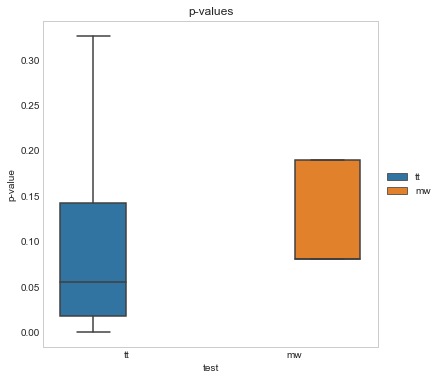

In [38]:
from scipy.stats import skewnorm

n = 3
alpha = 0.01

df = pd.DataFrame()
pvalues = []
tests = []
correct_tt = 0
correct_mw = 0
for i in range(1000):
    p1 = np.random.choice(population_geneA,size=n)
    p2 = np.random.choice(population_geneB,size=n)
    pvalue = stats.ttest_ind(p1,p2).pvalue
    pvalues.append(pvalue)
    if pvalue <= alpha:
        correct_tt+=1
    tests.append("tt")
    pvalue = stats.mannwhitneyu(p1,p2,alternative="two-sided").pvalue
    pvalues.append(pvalue)
    if pvalue <= alpha:
        correct_mw+=1
    tests.append("mw")
power_tt = correct_tt/1000.
print "t-test power for n=%i: %.2f" % (n,power_tt)
power_mw = correct_mw/1000.
print "Mann-Whitney power for n=%i: %.2f" % (n,power_mw)
            
df = pd.DataFrame()
df["p-value"] = pvalues
df["test"] = tests
plt.figure(figsize=(6,6))
sns.boxplot(x="test",y="p-value",hue="test",data=df,showfliers=False)
plt.title("p-values")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We can see that the two sample t-test has more power for normal distributions.

Now we do the exact same thing but for increasing sample sizes $n$:

t-test power for n=3: 0.13
Mann-Whitney power for n=3: 0.00
t-test power for n=4: 0.32
Mann-Whitney power for n=4: 0.00
t-test power for n=5: 0.48
Mann-Whitney power for n=5: 0.00
t-test power for n=6: 0.63
Mann-Whitney power for n=6: 0.40
t-test power for n=7: 0.68
Mann-Whitney power for n=7: 0.49
t-test power for n=8: 0.85
Mann-Whitney power for n=8: 0.72
t-test power for n=9: 0.88
Mann-Whitney power for n=9: 0.78
t-test power for n=10: 0.92
Mann-Whitney power for n=10: 0.87


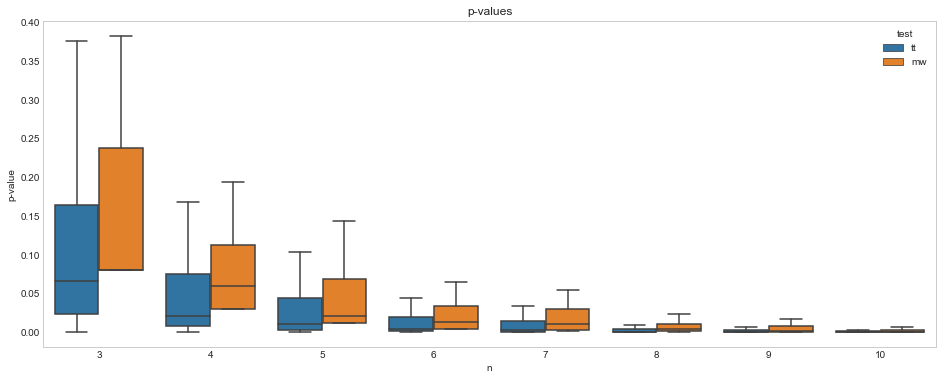

In [39]:
from scipy.stats import skewnorm

n = 9
alpha = 0.01

df = pd.DataFrame()
pvalues = []
ns = []
tests = []
for n in range(3,11,1):
    correct_tt = 0
    correct_mw = 0
    for i in range(100):
        p1 = np.random.choice(population_geneA,size=n)
        p2 = np.random.choice(population_geneB,size=n)
        pvalue = stats.ttest_ind(p1,p2).pvalue
        pvalues.append(pvalue)
        if pvalue <= alpha:
            correct_tt+=1
        tests.append("tt")
        ns.append(n)
        pvalue = stats.mannwhitneyu(p1,p2,alternative="two-sided").pvalue
        pvalues.append(pvalue)
        if pvalue <= alpha:
            correct_mw+=1
        tests.append("mw")
        ns.append(n)
    power_tt = correct_tt/100.
    print "t-test power for n=%i: %.2f" % (n,power_tt)
    power_mw = correct_mw/100.
    print "Mann-Whitney power for n=%i: %.2f" % (n,power_mw)
            
df = pd.DataFrame()
df["p-value"] = pvalues
df["test"] = tests
df["n"] = ns
plt.figure(figsize=(16,6))
sns.boxplot(x="n",y="p-value",hue="test",data=df,showfliers=False)
plt.title("p-values")
plt.show()

We can see that the t-test consistently has more power for for sample sizes up to $n=10$. The difference in power between the test does however decrease fast for larger sample sizes.